In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
original_df= pd.read_csv("data/data-single-multi-original.csv",delimiter=",")

In [19]:

df = original_df.copy()
df = df.fillna("None")

In [20]:
msg_sizes = df['msg_size_bytes'].unique().copy()
msg_sizes.sort()
msg_sizes.tolist()
small_msg = msg_sizes[msg_sizes<4097]
big_msg = msg_sizes[msg_sizes>=4097]
small_msg,big_msg
sub_benchmarks = ['Allreduce','Gather','Scatter','Alltoall','Allgather']
df['benchmark_type'].unique()

array(['Allreduce', 'Scatterv', 'Gather', 'Alltoall', 'Allgatherv',
       'Gatherv', 'Bcast', 'Reduce', 'Reduce_scatter', 'Scatter',
       'Allgather'], dtype=object)

### Effect of OFF-CHACHE-FLAG

In [14]:

df_subb = df[df['benchmark_type'].isin(sub_benchmarks)]

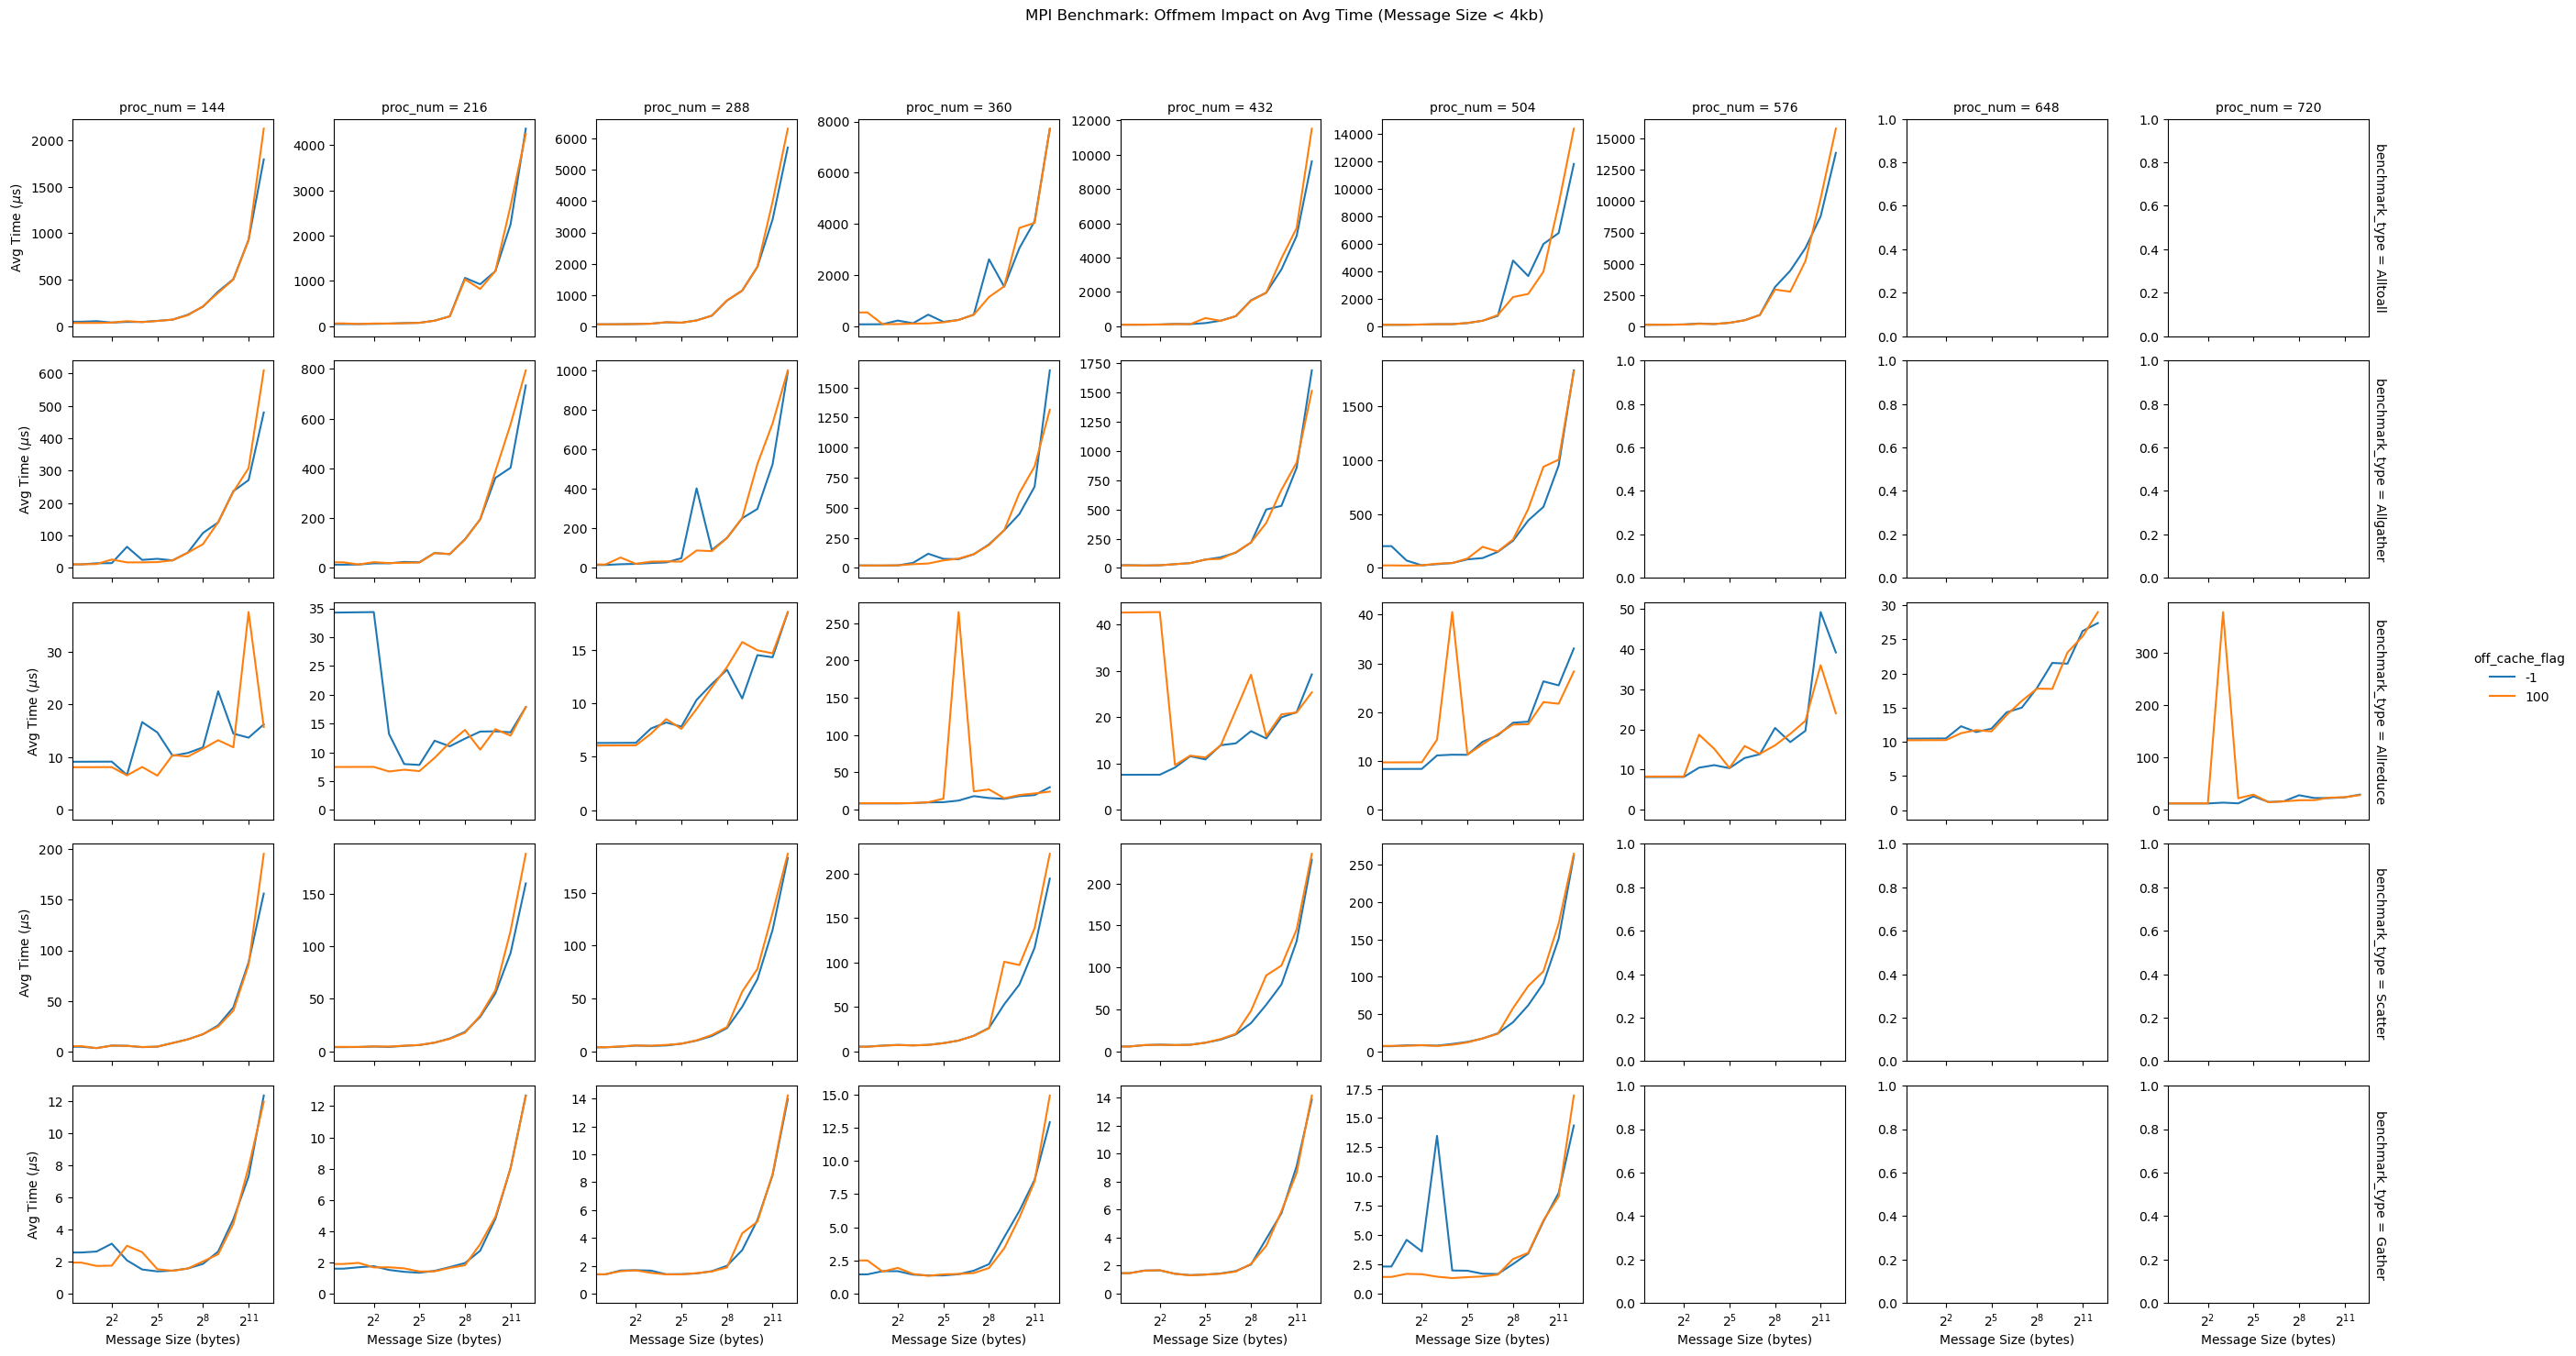

In [15]:
g_small = sns.FacetGrid(df_subb[df_subb['msg_size_bytes'].isin(small_msg)], row='benchmark_type', col='proc_num', hue='off_cache_flag', margin_titles=True, sharey=False,sharex=True,despine=False)
g_small.map_dataframe(sns.lineplot, x='msg_size_bytes', y='t_avg_usec')
# g_small.set(xscale="log2", yscale="linear")
for ax in g_small.axes.flat:
    ax.set_xscale("log",base=2)
g_small.add_legend()
g_small.set_axis_labels("Message Size (bytes)", r"Avg Time ($\mu$s)")
plt.subplots_adjust(top=0.9)
g_small.figure.suptitle("MPI Benchmark: Offmem Impact on Avg Time (Message Size < 4kb)")
plt.show()

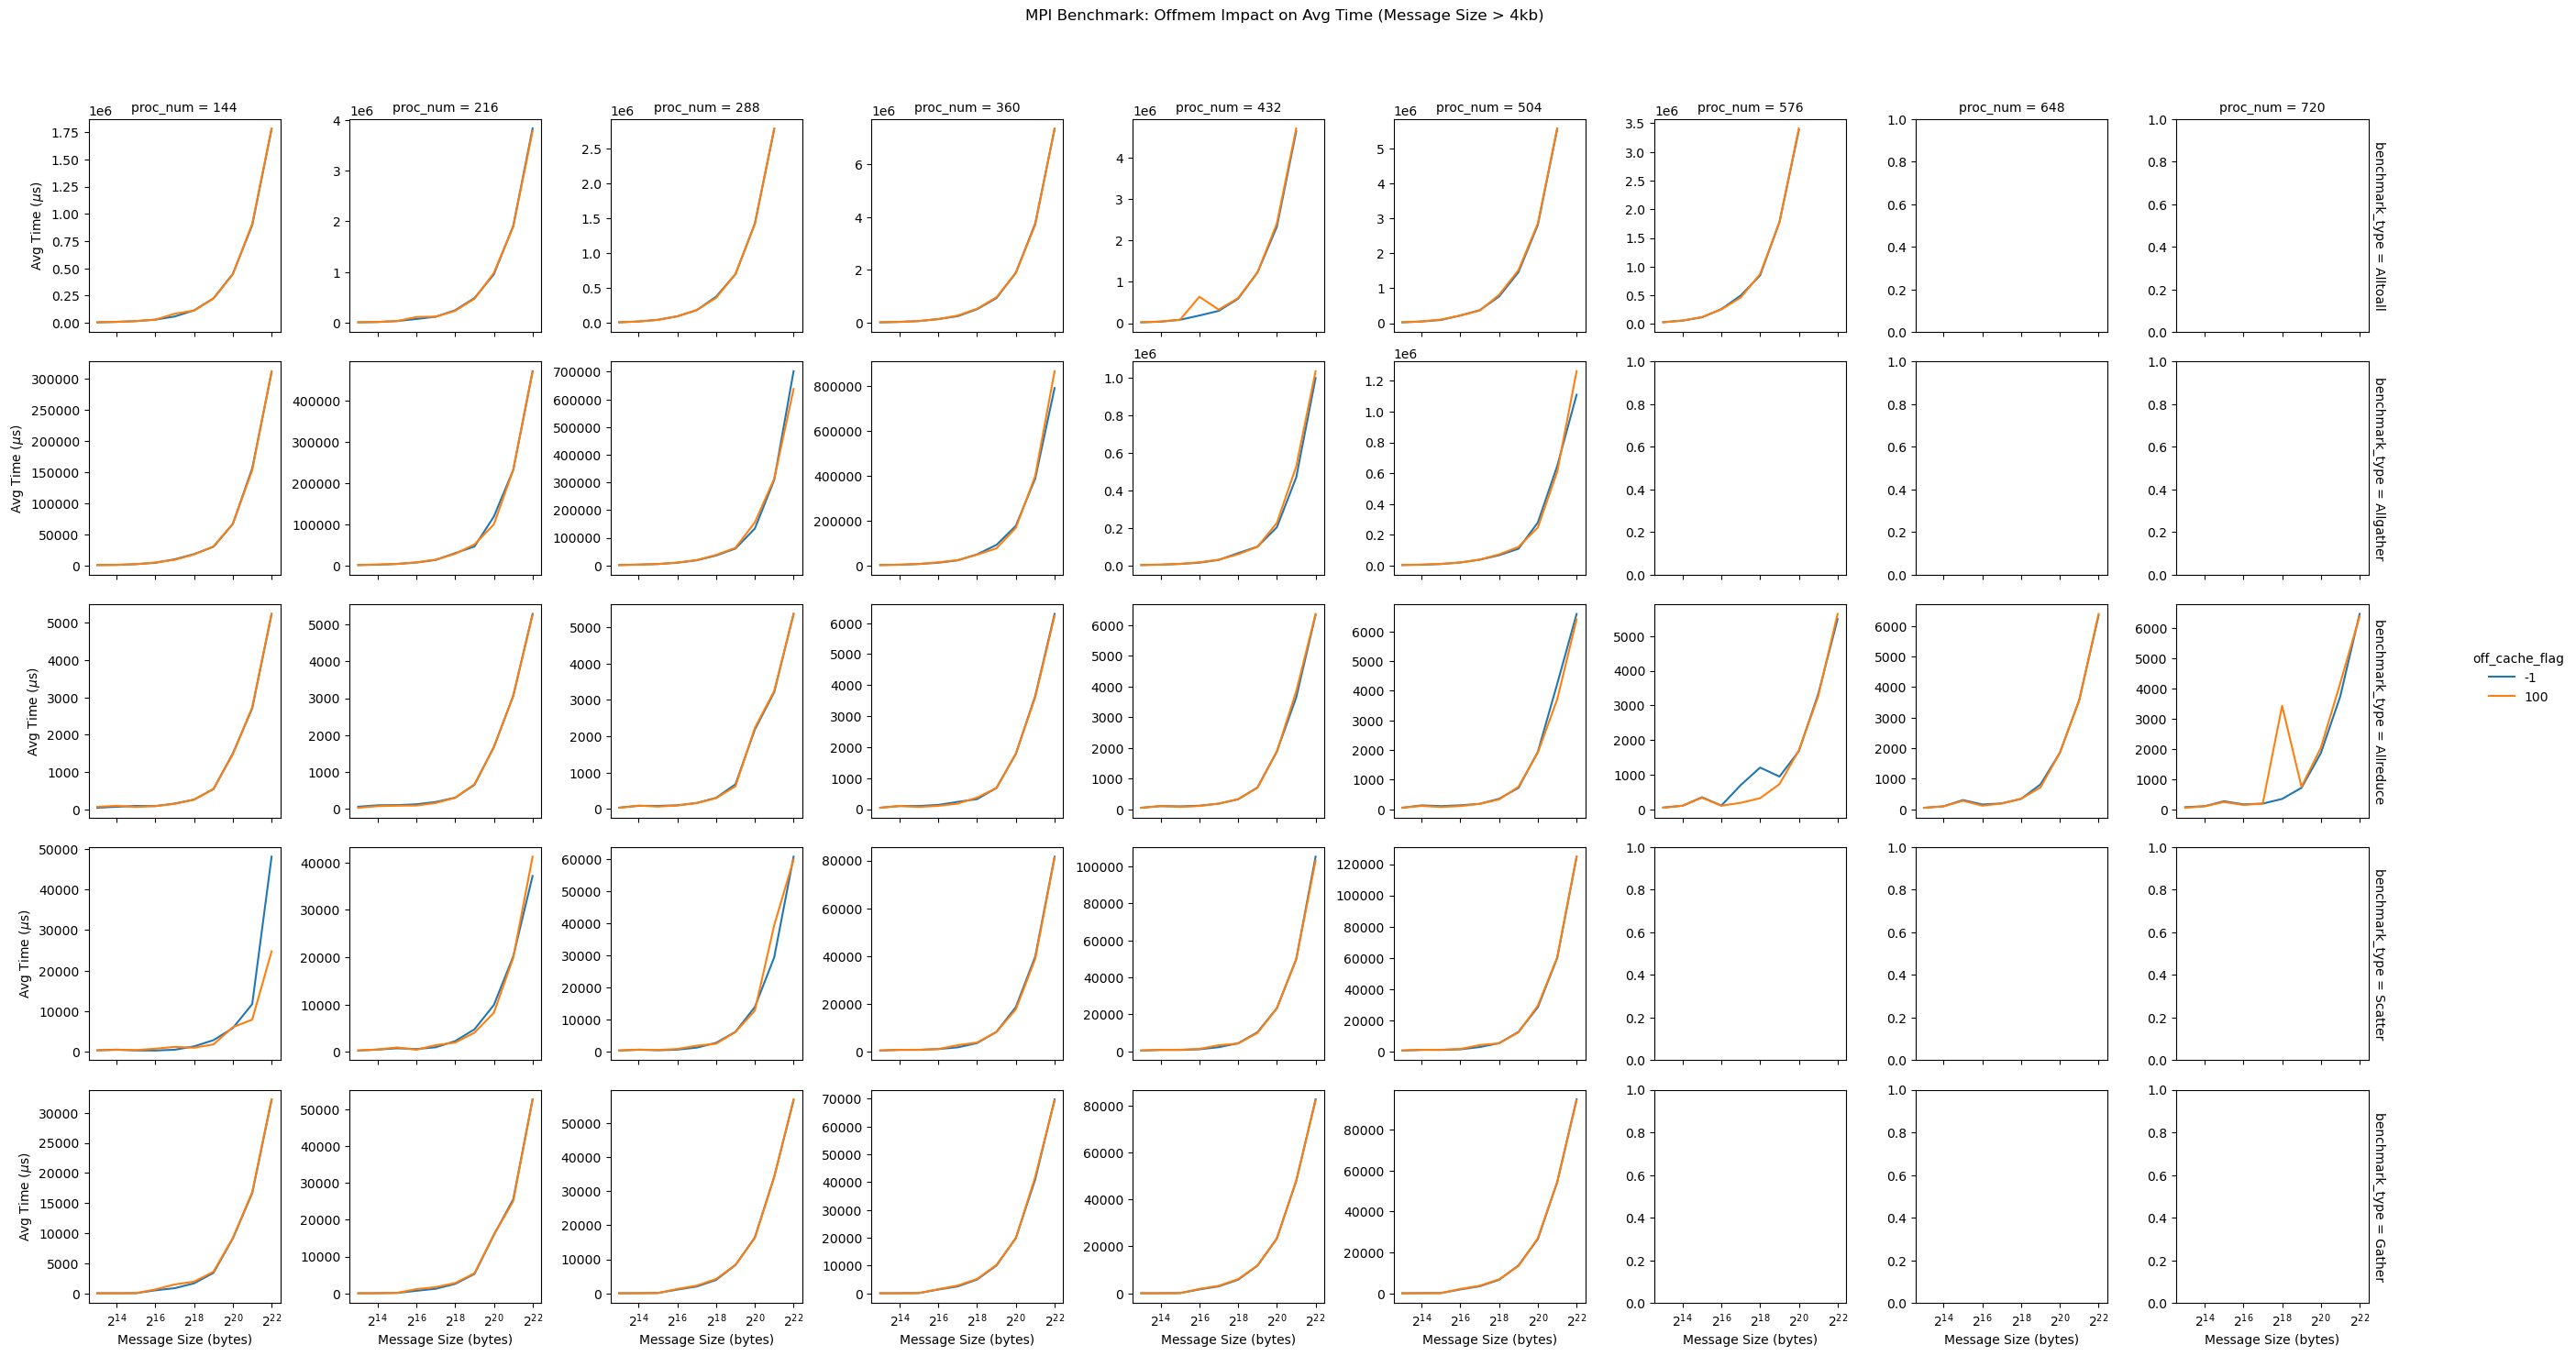

In [21]:
g_big = sns.FacetGrid(df_subb[df_subb['msg_size_bytes'].isin(big_msg)], row='benchmark_type', col='proc_num', hue='off_cache_flag', margin_titles=True, sharey=False,sharex=True,despine=False)
g_big.map_dataframe(sns.lineplot, x='msg_size_bytes', y='t_avg_usec')
# g_big.set(xscale="linear", yscale="linear")
for ax in g_big.axes.flat:
    ax.set_xscale("log",base=2)
g_big.add_legend()
g_big.set_axis_labels("Message Size (bytes)", r"Avg Time ($\mu$s)")
plt.subplots_adjust(top=0.9)
g_big.figure.suptitle("MPI Benchmark: Offmem Impact on Avg Time (Message Size > 4kb)")
plt.savefig("plots/off_cache_flag_effect1.png")
plt.show()